<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [182]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [183]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [184]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


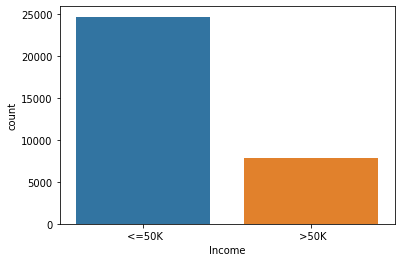

In [186]:
sns.countplot(df['Income'])

In [187]:
## the data is imbalanced ..balancing using oversampling

In [188]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [189]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [190]:
os = RandomOverSampler()

In [191]:
x_res ,y_res = os.fit_resample(x,y)

In [192]:
x_res = pd.DataFrame(x_res,columns=df.columns[0:-1])
y_res = pd.DataFrame(y_res,columns= ['Income'])

In [193]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resample dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({' <=50K': 24719, ' >50K': 7841})
Resample dataset shape Counter({'Income': 1})


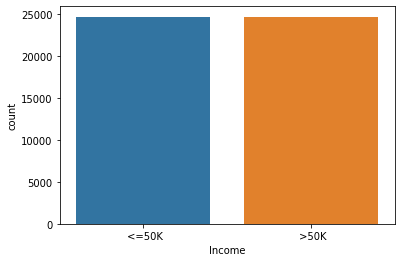

In [194]:
sns.countplot(y_res['Income'])

In [195]:
##now the data has been balanced

In [196]:
df_res = pd.concat((x_res,y_res),axis=1)

In [197]:
df_res.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [198]:
##handling missing values

In [199]:
df_res.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [200]:
## no null values

In [201]:
for i in df_res.columns :
  print(i)
  print(df_res[i].value_counts())
  print('\n\n')

Age
37    1526
38    1466
39    1440
41    1422
36    1421
      ... 
83      10
85       3
88       3
86       1
87       1
Name: Age, Length: 73, dtype: int64



Workclass
 Private             33367
 Self-emp-not-inc     4103
 Local-gov            3433
 Self-emp-inc         2468
 ?                    2281
 State-gov            2024
 Federal-gov          1741
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64



Fnlwgt
121124    40
148995    38
123011    38
241998    34
104501    33
          ..
82910      1
148444     1
508891     1
213977     1
98678      1
Name: Fnlwgt, Length: 21647, dtype: int64



Education
 HS-grad         14102
 Some-college    10265
 Bachelors       10072
 Masters          3857
 Assoc-voc        2167
 Assoc-acdm       1645
 Prof-school      1494
 11th             1293
 Doctorate        1071
 10th             1068
 7th-8th           729
 9th               571
 12th              501
 5th-6th           371
 1st-4th           181


In [202]:
##replacing '?' with variable unknown

In [203]:
df_res['Workclass'] = df_res['Workclass'].str.replace('?','Unknown')
df_res['Occupation'] = df_res['Occupation'].str.replace('?','Unknown')
df_res['Native_country'] = df_res['Native_country'].str.replace('?','Unknown')

In [204]:
df2 = df_res.copy()

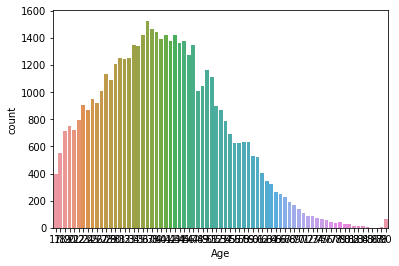

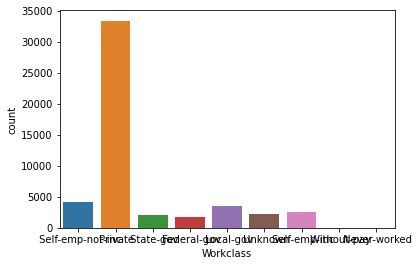

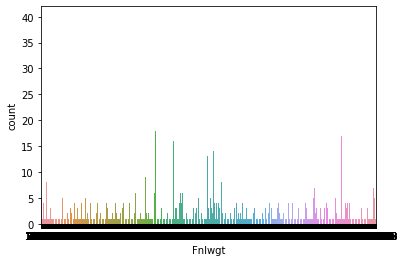

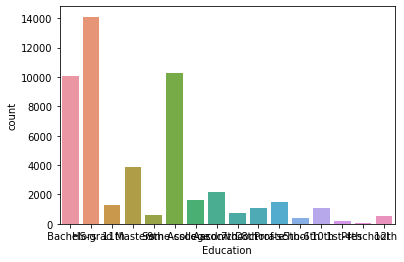

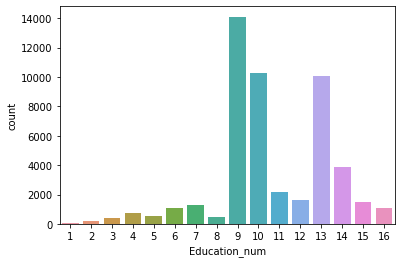

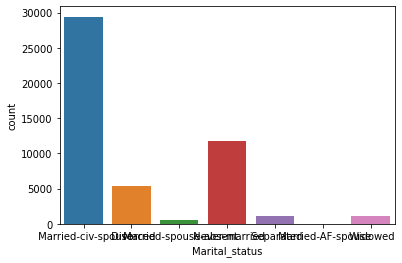

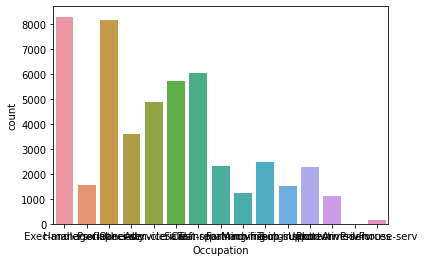

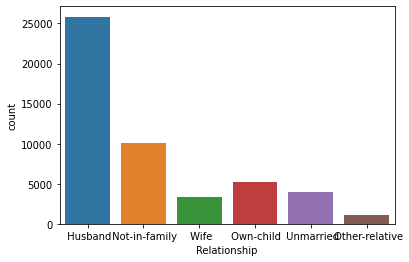

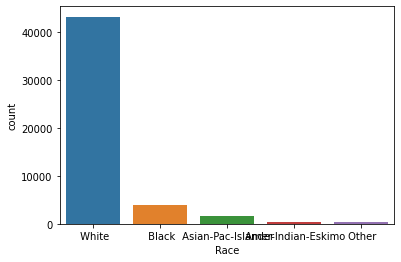

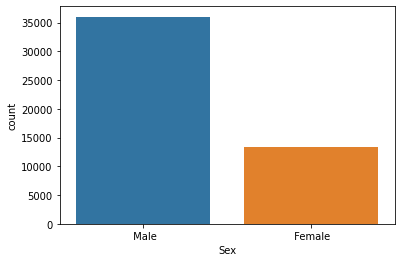

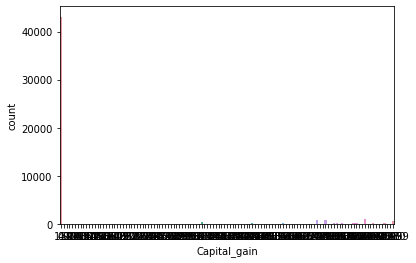

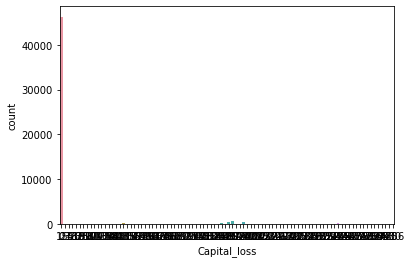

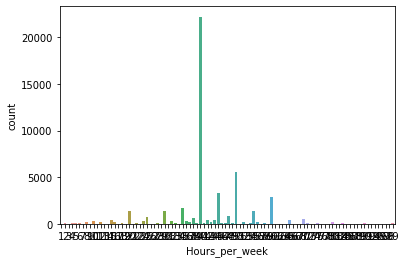

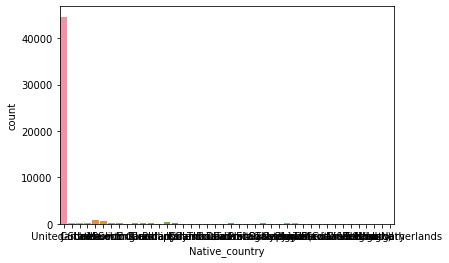

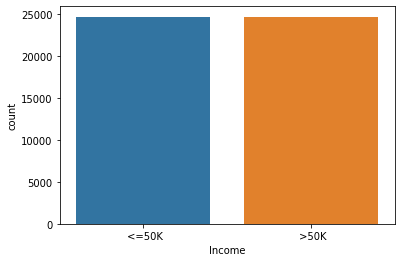

In [205]:
for i in df2.columns:
  plt.subplots()
  sns.countplot(df2[i ])

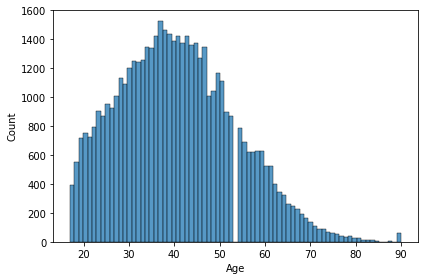

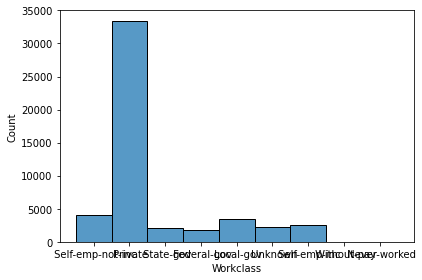

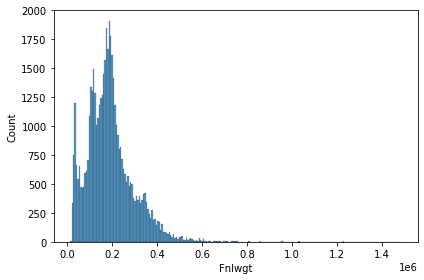

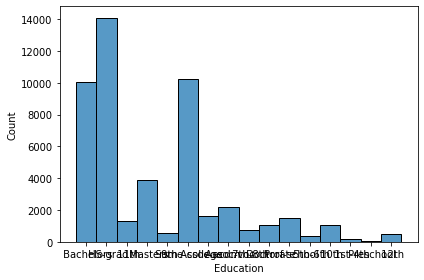

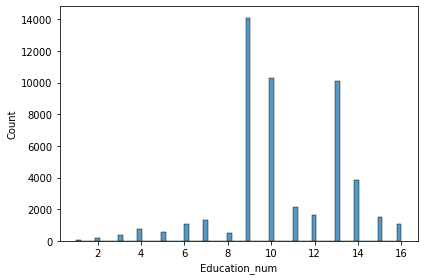

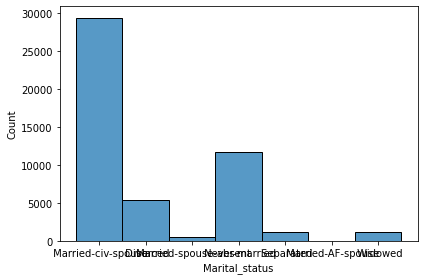

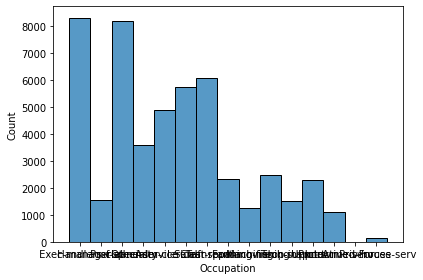

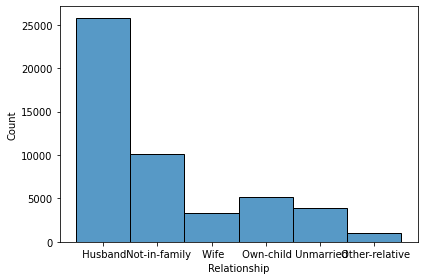

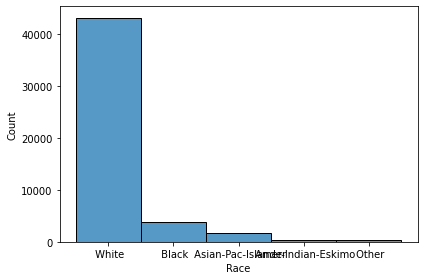

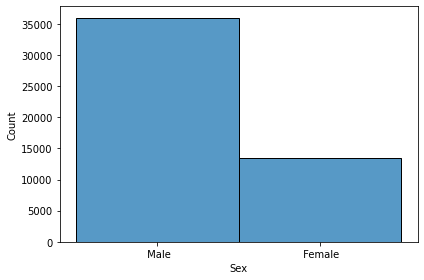

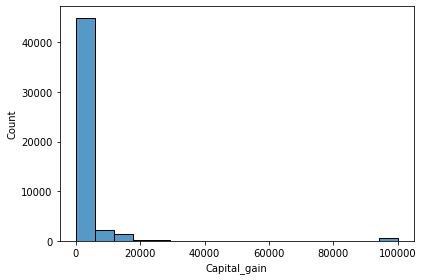

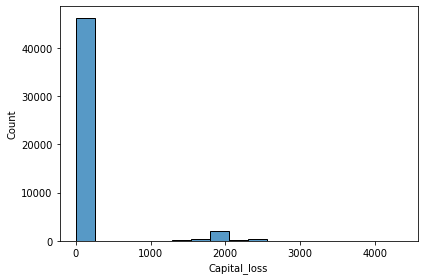

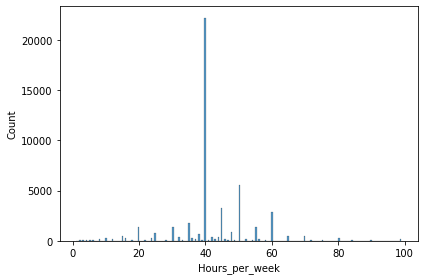

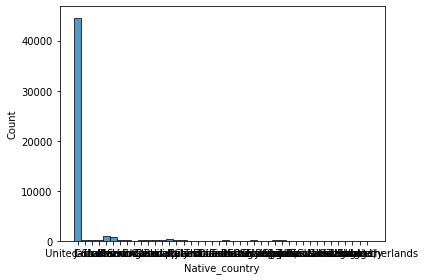

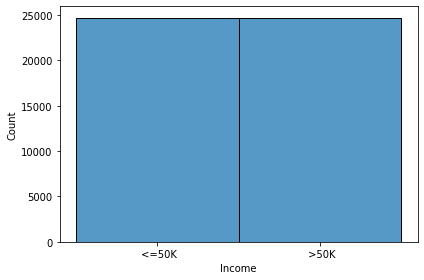

In [206]:
 for i in df2.columns:
   plt.subplots()
   sns.histplot(df2[i])
   plt.tight_layout()

In [207]:
# the data has skewness ...vil handle it later

In [208]:
#checking outliers

In [209]:
df2.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

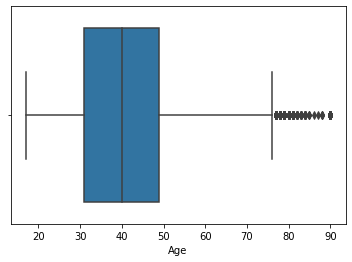

In [210]:
sns.boxplot(df2['Age'])

In [211]:
df2.dtypes

Age               object
Workclass         object
Fnlwgt            object
Education         object
Education_num     object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain      object
Capital_loss      object
Hours_per_week    object
Native_country    object
Income            object
dtype: object

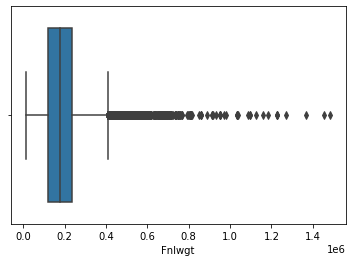

In [212]:
sns.boxplot(df2['Fnlwgt'])

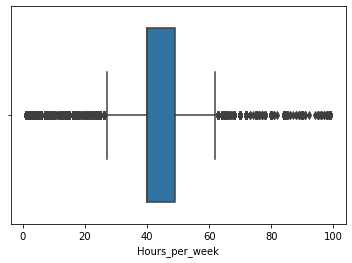

In [213]:
sns.boxplot(df2['Hours_per_week'])

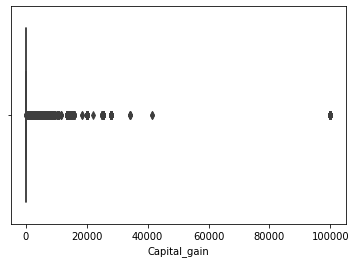

In [214]:
sns.boxplot(df2['Capital_gain'])

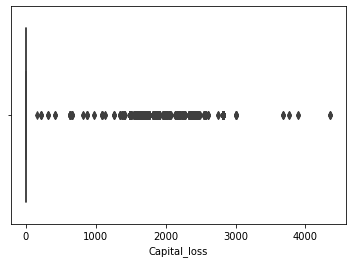

In [215]:
sns.boxplot(df2['Capital_loss'])


In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encode(df,col):
  df[col] = pd.DataFrame(le.fit_transform(df[col]))


In [217]:
encode(df2,'Workclass')

In [218]:
df2.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [219]:
encode(df2,'Education')
encode(df2,'Marital_status')
encode(df2,'Occupation')
encode(df2,'Relationship')
encode(df2,'Race')
encode(df2,'Sex')
encode(df2,'Native_country')
encode(df2,'Income')

In [220]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [221]:
df2 = df2.astype(int)

In [222]:
df2.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

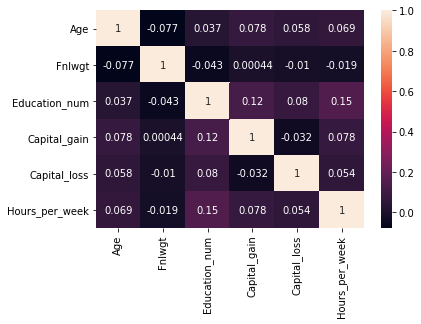

In [223]:
sns.heatmap(df.corr(),annot=True)

In [224]:
def correlation(dataset, threshold):
    col_corr = set()             # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [225]:
correlation(df2,0.5)

{'Sex'}

In [226]:
# no highly correlated features

In [227]:
#handling outliers

In [228]:
from scipy.stats import zscore
z = np.abs(zscore(df2))

In [229]:
np.where(z>3)

(array([    3,     9,    10, ..., 49425, 49433, 49435]),
 array([13, 12,  8, ...,  8,  8, 11]))

In [230]:
print("The shape of the dataframe before removing outliers is", df2.shape)
df3=df2[(z<3).all(axis=1)]
print("The shape of the dataframe after removing outliers is", df3.shape)

The shape of the dataframe before removing outliers is (49438, 15)
The shape of the dataframe after removing outliers is (41413, 15)


In [231]:
#approx 8k datapoints are removed

In [232]:
# modelling tha dataset

In [233]:
df3.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0


In [234]:
x = df3.iloc[:,0:-1]
y = df3.iloc[:,-1]

In [235]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.773689,1.237927,-1.093391,-0.424684,0.986755,-0.318617,-0.792656,-0.753673,0.308733,0.620897,-0.319981,-0.077883,-2.669597,0.162925
1,-0.167709,-0.182841,0.322435,0.136122,-0.623906,-1.784551,-0.325322,-0.144554,0.308733,0.620897,-0.319981,-0.077883,-0.148812,0.162925
2,1.009038,-0.182841,0.526515,-2.667906,-1.429237,-0.318617,-0.325322,-0.753673,-3.301480,0.620897,-0.319981,-0.077883,-0.148812,0.162925
3,-0.246158,-0.182841,1.059968,0.416525,1.389421,-0.318617,-0.792656,2.291921,0.308733,-1.610572,-0.319981,-0.077883,-0.148812,0.162925
4,0.695239,-0.182841,-0.270910,-1.265892,-2.234568,0.414350,0.142013,-0.144554,-3.301480,-1.610572,-0.319981,-0.077883,-2.389510,-6.837186


In [236]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(50,100
                         ):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [237]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_accuracy(lg,x,y)

The accuracy score achieved at r state 50 is 0.7605939876856211
The accuracy score achieved at r state 51 is 0.765664614270192
The accuracy score achieved at r state 52 is 0.7655438850657974
The accuracy score achieved at r state 53 is 0.7680791983580828
The accuracy score achieved at r state 54 is 0.7673548231317155
The accuracy score achieved at r state 55 is 0.7654231558614029
The accuracy score achieved at r state 56 is 0.7667511771097428
The accuracy score achieved at r state 57 is 0.7626463841603284
The accuracy score achieved at r state 58 is 0.7627671133647229
The accuracy score achieved at r state 59 is 0.7580586743933357
The accuracy score achieved at r state 60 is 0.7665097187009537
The accuracy score achieved at r state 61 is 0.7603525292768321
The accuracy score achieved at r state 62 is 0.7632500301823011
The accuracy score achieved at r state 63 is 0.765664614270192
The accuracy score achieved at r state 64 is 0.7575757575757576
The accuracy score achieved at r state 65 

0.778341180731619

In [238]:
score=cross_val_score(lg,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.77


In [239]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=69,test_size=0.20) ##final set of train and test data

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [241]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [242]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [243]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'penalty': 'l2'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.7684413859712664

The cross val score is 0.7659915160693019

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4293
           1       0.76      0.76      0.76      3990

    accuracy                           0.77      8283
   macro avg       0.77      0.77      0.77      8283
weighted avg       0.77      0.77      0.77      8283


[[3333  960]
 [ 958 3032]]

roc_auc_score 0.768139951556039


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
  

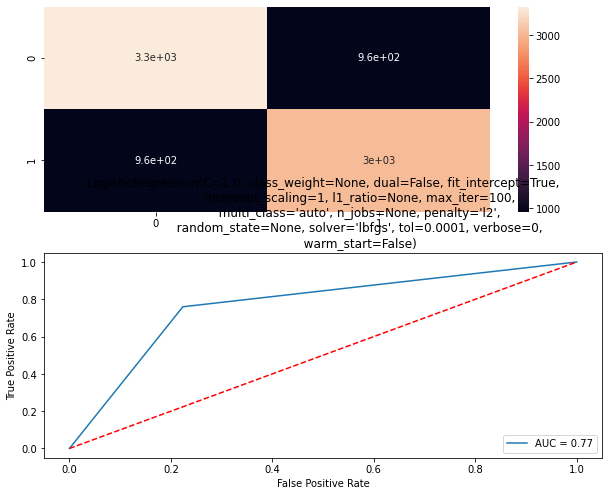

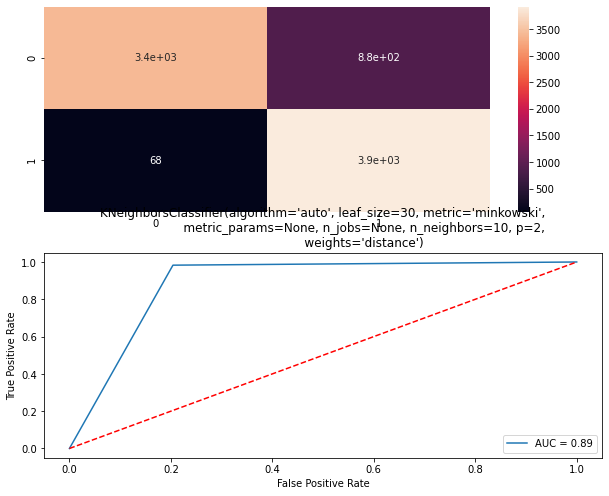

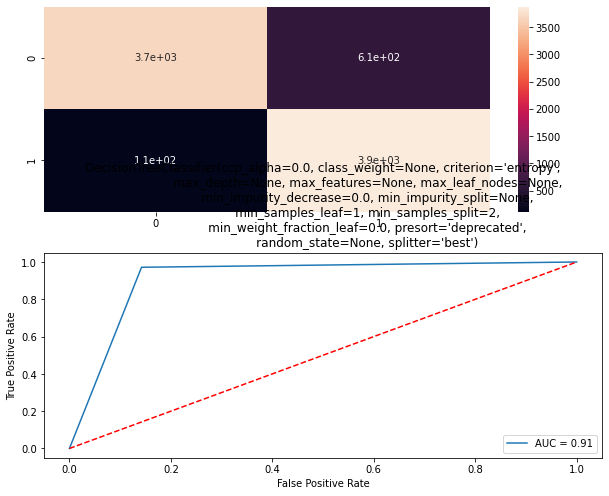

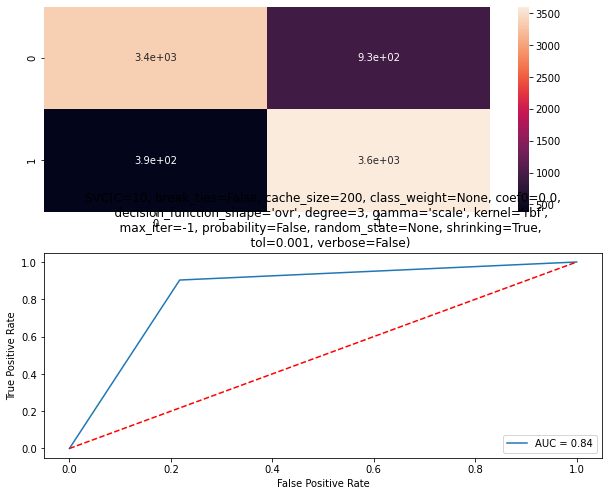

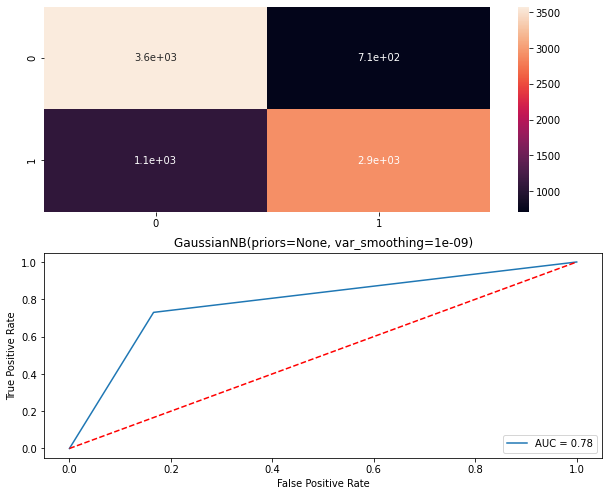

In [244]:
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

algorithms=[LogisticRegression(penalty='l2'),KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [245]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.768441,0.765992,0.768140
1,<class 'sklearn.neighbors._classification.KNei...,0.886032,0.889335,0.889452
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.912713,0.918045,0.914794
3,<class 'sklearn.svm._classes.SVC'>,0.840758,0.837370,0.842964
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.783895,0.776012,0.781987


In [246]:
### the best model is decision tree classifier

In [247]:
## lets try some boosting techniques

In [248]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [249]:
rf=RandomForestClassifier(n_estimators=100)
max_accuracy(rf,x,y)

The accuracy score achieved at r state 50 is 0.9282868525896414
The accuracy score achieved at r state 51 is 0.9256308100929614
The accuracy score achieved at r state 52 is 0.9310636242907159
The accuracy score achieved at r state 53 is 0.9314258119038995
The accuracy score achieved at r state 54 is 0.934202583604974
The accuracy score achieved at r state 55 is 0.929977061451165
The accuracy score achieved at r state 56 is 0.9275624773632741
The accuracy score achieved at r state 57 is 0.931546541108294
The accuracy score achieved at r state 58 is 0.9280453941808523
The accuracy score achieved at r state 59 is 0.9265966437281178
The accuracy score achieved at r state 60 is 0.9304599782687432
The accuracy score achieved at r state 61 is 0.9256308100929614
The accuracy score achieved at r state 62 is 0.922854038391887
The accuracy score achieved at r state 63 is 0.9311843534951104
The accuracy score achieved at r state 64 is 0.9241820596402269
The accuracy score achieved at r state 65 is

0.934202583604974

In [250]:
cscore=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cscore)

The cross val score of Random forest classifier is 0.9334753220730683


In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#gc=GradientBoostingClassifier()
#parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
#gbc=GridSearchCV(gc,parameters)
#gbc.fit(train_x,train_y)
#gbc.best_params_

In [ ]:
#gc=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, n_estimators= 100)
#max_accuracy(gc,x,y)

In [ ]:
#cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
#print("The cross val score of GradientBoosting classifier is", cs)

In [ ]:
#from sklearn.ensemble import AdaBoostClassifier
#ad=AdaBoostClassifier()
#parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
#gd=GridSearchCV(ad,parameters)
#gd.fit(train_x,train_y)
#gd.best_params_

In [ ]:
#gc=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 200)
#max_accuracy(gc,x,y)

In [ ]:
#cs=cross_val_score(ad,x,y,cv=5,scoring='accuracy').mean()
#print("The cross val score of AdaBoost classifier is", cs)

In [ ]:
## random forest is giving best reesults ..we can also model gradient boosting and ada boost as they are taking more time m saving with ranfom forest.. but random forest is already giving best results

In [ ]:
#import joblib
#joblib.dump(rf,'cencus.pkl')   #saving model